In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_pd = pd.read_csv('./customer/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df_pd.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
import findspark
findspark.init('/app/spark')

In [5]:
from pyspark.sql import SparkSession

In [6]:
spark = SparkSession.builder.appName('Customer').getOrCreate()

In [7]:
df = spark.read.csv('./customer/WA_Fn-UseC_-Telco-Customer-Churn.csv', header=True, inferSchema=True)

In [8]:
df.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: string (nullable = true)
 |-- Churn: string (nullable = true)



In [9]:
import seaborn as sns

In [10]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [11]:
df.groupby('gender').count().show()

+------+-----+
|gender|count|
+------+-----+
|Female| 3488|
|  Male| 3555|
+------+-----+



In [12]:
df.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: string (nullable = true)
 |-- Churn: string (nullable = true)



In [13]:
df_pd.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


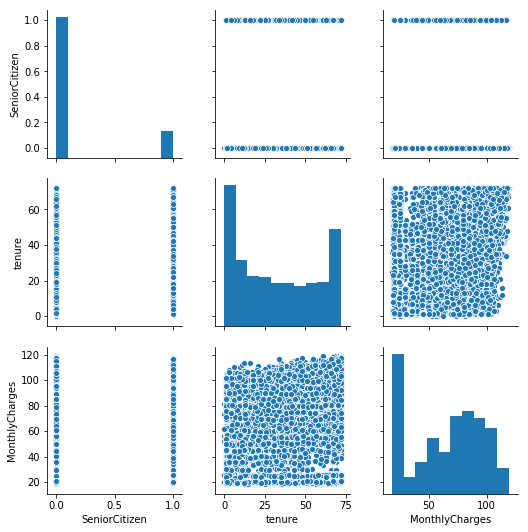

In [14]:
sns.pairplot(df_pd)

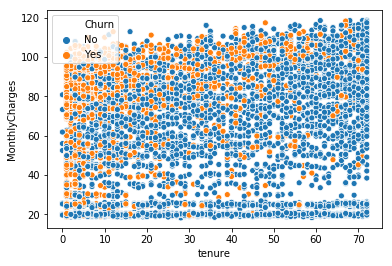

In [15]:
sns.scatterplot(x='tenure', y='MonthlyCharges', data=df_pd, hue='Churn')

In [16]:
len(df_pd[df_pd['SeniorCitizen'].isna()])

0

In [17]:
[col for col in df_pd.columns if len(df_pd[df_pd[col].isna()])==0]

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [18]:
len(df_pd.columns)

21

In [19]:
df.groupBy('SeniorCitizen').count().show()

+-------------+-----+
|SeniorCitizen|count|
+-------------+-----+
|            1| 1142|
|            0| 5901|
+-------------+-----+



In [20]:
for col in df.columns[1:]:
    df.groupBy(col).count().show()

+------+-----+
|gender|count|
+------+-----+
|Female| 3488|
|  Male| 3555|
+------+-----+

+-------------+-----+
|SeniorCitizen|count|
+-------------+-----+
|            1| 1142|
|            0| 5901|
+-------------+-----+

+-------+-----+
|Partner|count|
+-------+-----+
|     No| 3641|
|    Yes| 3402|
+-------+-----+

+----------+-----+
|Dependents|count|
+----------+-----+
|        No| 4933|
|       Yes| 2110|
+----------+-----+

+------+-----+
|tenure|count|
+------+-----+
|    31|   65|
|    65|   76|
|    53|   70|
|    34|   65|
|    28|   57|
|    27|   72|
|    26|   79|
|    44|   51|
|    12|  117|
|    22|   90|
|    47|   68|
|     1|  613|
|    52|   80|
|    13|  109|
|    16|   80|
|     6|  110|
|     3|  200|
|    20|   71|
|    40|   64|
|    57|   65|
+------+-----+
only showing top 20 rows

+------------+-----+
|PhoneService|count|
+------------+-----+
|          No|  682|
|         Yes| 6361|
+------------+-----+

+----------------+-----+
|   MultipleLines|count|
+

In [21]:
from pyspark.ml.feature import StringIndexer

In [22]:
indexer = StringIndexer(inputCol='gender', outputCol='genderInd').fit(df)

In [23]:
indexer.transform(df).select('gender', 'genderInd').show()

+------+---------+
|gender|genderInd|
+------+---------+
|Female|      1.0|
|  Male|      0.0|
|  Male|      0.0|
|  Male|      0.0|
|Female|      1.0|
|Female|      1.0|
|  Male|      0.0|
|Female|      1.0|
|Female|      1.0|
|  Male|      0.0|
|  Male|      0.0|
|  Male|      0.0|
|  Male|      0.0|
|  Male|      0.0|
|  Male|      0.0|
|Female|      1.0|
|Female|      1.0|
|  Male|      0.0|
|Female|      1.0|
|Female|      1.0|
+------+---------+
only showing top 20 rows



In [24]:
df.summary().show()

+-------+----------+------+------------------+-------+----------+------------------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+------------------+------------------+-----+
|summary|customerID|gender|     SeniorCitizen|Partner|Dependents|            tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|    MonthlyCharges|      TotalCharges|Churn|
+-------+----------+------+------------------+-------+----------+------------------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+------------------+------------------+-----+
|  count|      7043|  7043|              7043|   7043|      7043|     

In [25]:
df.TotalCharges = df.TotalCharges.astype('float')

In [26]:
df.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: string (nullable = true)
 |-- Churn: string (nullable = true)



In [27]:
rem_list = ['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [28]:
col_list = [col for col in df.columns if col not in rem_list]

In [29]:
col_list

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [31]:
def col_indexer(df, columns):
    for col in columns:
        outputCol = col+'Idx'
        indexer = StringIndexer(inputCol=col, outputCol=outputCol).fit(df)
        df = indexer.transform(df)
    return df

In [32]:
df_idx = col_indexer(df, col_list)

In [33]:
df_idx.columns

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'genderIdx',
 'SeniorCitizenIdx',
 'PartnerIdx',
 'DependentsIdx',
 'PhoneServiceIdx',
 'MultipleLinesIdx',
 'InternetServiceIdx',
 'OnlineSecurityIdx',
 'OnlineBackupIdx',
 'DeviceProtectionIdx',
 'TechSupportIdx',
 'StreamingTVIdx',
 'StreamingMoviesIdx',
 'ContractIdx',
 'PaperlessBillingIdx',
 'PaymentMethodIdx',
 'ChurnIdx']

In [34]:
df_idx_new = df_idx.select('customerID', 'tenure', 'MonthlyCharges', 'genderIdx',
 'SeniorCitizenIdx',
 'PartnerIdx',
 'DependentsIdx',
 'PhoneServiceIdx',
 'MultipleLinesIdx',
 'InternetServiceIdx',
 'OnlineSecurityIdx',
 'OnlineBackupIdx',
 'DeviceProtectionIdx',
 'TechSupportIdx',
 'StreamingTVIdx',
 'StreamingMoviesIdx',
 'ContractIdx',
 'PaperlessBillingIdx',
 'PaymentMethodIdx', 'Churn', 'ChurnIdx')

In [35]:
from pyspark.ml.feature import VectorAssembler

In [36]:
df_idx_new.columns[1:-2]

['tenure',
 'MonthlyCharges',
 'genderIdx',
 'SeniorCitizenIdx',
 'PartnerIdx',
 'DependentsIdx',
 'PhoneServiceIdx',
 'MultipleLinesIdx',
 'InternetServiceIdx',
 'OnlineSecurityIdx',
 'OnlineBackupIdx',
 'DeviceProtectionIdx',
 'TechSupportIdx',
 'StreamingTVIdx',
 'StreamingMoviesIdx',
 'ContractIdx',
 'PaperlessBillingIdx',
 'PaymentMethodIdx']

In [37]:
assembler = VectorAssembler(inputCols=df_idx_new.columns[1:-2], outputCol='features')

In [38]:
df_vec = assembler.transform(df_idx_new)

In [39]:
df_vec.show()

+----------+------+--------------+---------+----------------+----------+-------------+---------------+----------------+------------------+-----------------+---------------+-------------------+--------------+--------------+------------------+-----------+-------------------+----------------+-----+--------+--------------------+
|customerID|tenure|MonthlyCharges|genderIdx|SeniorCitizenIdx|PartnerIdx|DependentsIdx|PhoneServiceIdx|MultipleLinesIdx|InternetServiceIdx|OnlineSecurityIdx|OnlineBackupIdx|DeviceProtectionIdx|TechSupportIdx|StreamingTVIdx|StreamingMoviesIdx|ContractIdx|PaperlessBillingIdx|PaymentMethodIdx|Churn|ChurnIdx|            features|
+----------+------+--------------+---------+----------------+----------+-------------+---------------+----------------+------------------+-----------------+---------------+-------------------+--------------+--------------+------------------+-----------+-------------------+----------------+-----+--------+--------------------+
|7590-VHVEG|     1|

In [40]:
df_vec.select('customerID', 'features', 'ChurnIdx').show()

+----------+--------------------+--------+
|customerID|            features|ChurnIdx|
+----------+--------------------+--------+
|7590-VHVEG|(18,[0,1,2,4,6,7,...|     0.0|
|5575-GNVDE|(18,[0,1,8,9,11,1...|     0.0|
|3668-QPYBK|(18,[0,1,8,9,10,1...|     1.0|
|7795-CFOCW|[45.0,42.3,0.0,0....|     0.0|
|9237-HQITU|(18,[0,1,2],[2.0,...|     1.0|
|9305-CDSKC|(18,[0,1,2,7,11,1...|     1.0|
|1452-KIOVK|(18,[0,1,5,7,10,1...|     0.0|
|6713-OKOMC|(18,[0,1,2,6,7,8,...|     0.0|
|7892-POOKP|(18,[0,1,2,4,7,11...|     1.0|
|6388-TABGU|(18,[0,1,5,8,9,10...|     0.0|
|9763-GRSKD|(18,[0,1,4,5,8,9,...|     0.0|
|7469-LKBCI|[16.0,18.95,0.0,0...|     0.0|
|8091-TTVAX|(18,[0,1,4,7,11,1...|     0.0|
|0280-XJGEX|(18,[0,1,7,10,11,...|     1.0|
|5129-JLPIS|(18,[0,1,9,11,12,...|     0.0|
|3655-SNQYZ|[69.0,113.25,1.0,...|     0.0|
|8191-XWSZG|[52.0,20.65,1.0,0...|     0.0|
|9959-WOFKT|[71.0,106.7,0.0,0...|     0.0|
|4190-MFLUW|(18,[0,1,2,4,5,8,...|     1.0|
|4183-MYFRB|(18,[0,1,2,10,11,...|     0.0|
+----------

In [41]:
df_set = df_vec.select('customerID', 'features', 'ChurnIdx')

In [42]:
X_train, X_test = df_set.randomSplit([0.8, 0.2])

In [43]:
X_train.show()

+----------+--------------------+--------+
|customerID|            features|ChurnIdx|
+----------+--------------------+--------+
|0002-ORFBO|[9.0,65.6,1.0,0.0...|     0.0|
|0003-MKNFE|(18,[0,1,7,8,14,1...|     0.0|
|0004-TLHLJ|(18,[0,1,11],[4.0...|     1.0|
|0011-IGKFF|(18,[0,1,3,4,10,1...|     1.0|
|0013-EXCHZ|(18,[0,1,2,3,4,12...|     1.0|
|0014-BMAQU|(18,[0,1,4,7,9,12...|     0.0|
|0016-QLJIS|[65.0,90.45,1.0,0...|     0.0|
|0017-IUDMW|[72.0,116.8,1.0,0...|     0.0|
|0020-INWCK|[71.0,95.75,1.0,0...|     0.0|
|0020-JDNXP|[34.0,61.25,1.0,0...|     0.0|
|0021-IKXGC|(18,[0,1,2,3,7],[...|     0.0|
|0022-TCJCI|(18,[0,1,3,8,9,11...|     1.0|
|0023-HGHWL|(18,[0,1,3,6,7,8]...|     1.0|
|0023-UYUPN|[50.0,25.2,1.0,1....|     0.0|
|0027-KWYKW|(18,[0,1,2,4,5,7,...|     0.0|
|0030-FNXPP|[3.0,19.85,1.0,0....|     0.0|
|0031-PVLZI|[4.0,20.35,1.0,0....|     1.0|
|0032-PGELS|[1.0,30.5,1.0,0.0...|     1.0|
|0036-IHMOT|[55.0,103.7,1.0,0...|     0.0|
|0042-JVWOJ|[26.0,19.6,0.0,0....|     0.0|
+----------

In [44]:
X_test.show()

+----------+--------------------+--------+
|customerID|            features|ChurnIdx|
+----------+--------------------+--------+
|0013-MHZWF|(18,[0,1,2,5,8,12...|     0.0|
|0013-SMEOE|[71.0,109.7,1.0,1...|     0.0|
|0015-UOCOJ|(18,[0,1,2,3,8,9]...|     0.0|
|0017-DINOC|[54.0,45.2,0.0,0....|     0.0|
|0018-NYROU|(18,[0,1,2,4],[5....|     0.0|
|0019-EFAEP|(18,[0,1,2,7,9,10...|     0.0|
|0019-GFNTW|[56.0,45.05,1.0,0...|     0.0|
|0023-XUOPT|(18,[0,1,2,4,7,10...|     1.0|
|0040-HALCW|[54.0,20.4,0.0,0....|     0.0|
|0048-LUMLS|(18,[0,1,4,5,13,1...|     0.0|
|0076-LVEPS|[29.0,45.0,0.0,0....|     0.0|
|0125-LZQXK|(18,[0,1,11,12,13...|     1.0|
|0147-ESWWR|(18,[0,1,2,3,4,7,...|     0.0|
|0148-DCDOS|(18,[0,1,7,13,14,...|     1.0|
|0178-CIIKR|[3.0,19.95,1.0,0....|     0.0|
|0195-IESCP|(18,[0,1,4,7,14],...|     1.0|
|0197-PNKNK|[69.0,84.45,1.0,0...|     0.0|
|0218-QNVAS|[71.0,100.55,0.0,...|     0.0|
|0224-NIJLP|[8.0,20.15,0.0,0....|     0.0|
|0224-RLWWD|(18,[0,1,2,3,8],[...|     0.0|
+----------

In [45]:
from pyspark.ml.classification import RandomForestClassifier

In [46]:
rfc = RandomForestClassifier(featuresCol='features', 
                             labelCol='ChurnIdx', 
                             predictionCol='prediction', 
                             maxDepth=10)

In [47]:
model = rfc.fit(X_train)

In [48]:
pred = model.transform(X_test)

In [49]:
pred.show()

+----------+--------------------+--------+--------------------+--------------------+----------+
|customerID|            features|ChurnIdx|       rawPrediction|         probability|prediction|
+----------+--------------------+--------+--------------------+--------------------+----------+
|0013-MHZWF|(18,[0,1,2,5,8,12...|     0.0|[12.0075270204228...|[0.60037635102114...|       0.0|
|0013-SMEOE|[71.0,109.7,1.0,1...|     0.0|[19.4742394435727...|[0.97371197217863...|       0.0|
|0015-UOCOJ|(18,[0,1,2,3,8,9]...|     0.0|[10.0043568873433...|[0.50021784436716...|       0.0|
|0017-DINOC|[54.0,45.2,0.0,0....|     0.0|[19.6563467919932...|[0.98281733959966...|       0.0|
|0018-NYROU|(18,[0,1,2,4],[5....|     0.0|[6.74747847167312...|[0.33737392358365...|       1.0|
|0019-EFAEP|(18,[0,1,2,7,9,10...|     0.0|[17.8645187799450...|[0.89322593899725...|       0.0|
|0019-GFNTW|[56.0,45.05,1.0,0...|     0.0|[18.8473100834009...|[0.94236550417004...|       0.0|
|0023-XUOPT|(18,[0,1,2,4,7,10...|     1.

In [50]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [51]:
ev = BinaryClassificationEvaluator(rawPredictionCol='rawPrediction', labelCol='ChurnIdx', 
                                  metricName='areaUnderROC')

In [52]:
ev.evaluate(pred)

0.8402271830025447

In [53]:
from pyspark.ml.classification import GBTClassifier

In [85]:
gbt = GBTClassifier(featuresCol='features', labelCol='ChurnIdx', predictionCol='prediction',
                   maxDepth=5, maxIter=10)
gmodel = gbt.fit(X_train)

In [82]:
gpred = gmodel.transform(X_test)

In [83]:
gpred.show()

+----------+--------------------+--------+--------------------+--------------------+----------+
|customerID|            features|ChurnIdx|       rawPrediction|         probability|prediction|
+----------+--------------------+--------+--------------------+--------------------+----------+
|0013-MHZWF|(18,[0,1,2,5,8,12...|     0.0|[0.61704426001875...|[0.77453335969282...|       0.0|
|0013-SMEOE|[71.0,109.7,1.0,1...|     0.0|[0.91863091251497...|[0.86262454634730...|       0.0|
|0015-UOCOJ|(18,[0,1,2,3,8,9]...|     0.0|[0.56280491673535...|[0.75502779970893...|       0.0|
|0017-DINOC|[54.0,45.2,0.0,0....|     0.0|[1.13743054407536...|[0.90677353462802...|       0.0|
|0018-NYROU|(18,[0,1,2,4],[5....|     0.0|[-0.1703941951964...|[0.41561798033277...|       1.0|
|0019-EFAEP|(18,[0,1,2,7,9,10...|     0.0|[1.16764690344366...|[0.91175818046505...|       0.0|
|0019-GFNTW|[56.0,45.05,1.0,0...|     0.0|[1.14808813523474...|[0.90855986386483...|       0.0|
|0023-XUOPT|(18,[0,1,2,4,7,10...|     1.

In [84]:
geval = BinaryClassificationEvaluator(rawPredictionCol='rawPrediction', labelCol='ChurnIdx', 
                                  metricName='areaUnderROC')
geval.evaluate(gpred)

0.8475128306356093